In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv
from pyvis.network import Network
import os

Create Network

In [2]:
class Visualization:
    def __init__(self):
        self.df = pd.read_csv('data/network results/combined_results_1000_filt.csv')

        self.clusters = {
            0: ['Depressed.At.Baseline', 'Loneliness', 'Social.Isolation', 'PHQ9.No.Info', 'PHQ9.Screen', 'PHQ9.Items', 'PHQ9.Severity', 'CIDI.MDD.No.Info', 'CIDI.MDD.Screen', 'CIDI.MDD.Response', 'CIDI.MDD.Severity', 'GAD.CIDI.Somatic'],
            1: ['CVD'],
            2: ['Apolipoprotein_A1', 'Apolipoprotein_B'],
            3: ['Concentration_of_Chylomicrons_and_Extremely_Large_VLDL_Particles', 'Concentration_of_HDL_Particles', 'Concentration_of_IDL_Particles', 'Concentration_of_Large_HDL_Particles', 'Concentration_of_Large_LDL_Particles', 'Concentration_of_Large_VLDL_Particles', 'Concentration_of_LDL_Particles', 'Concentration_of_Medium_HDL_Particles', 'Concentration_of_Medium_LDL_Particles', 'Concentration_of_Medium_VLDL_Particles', 'Concentration_of_Small_HDL_Particles', 'Concentration_of_Small_LDL_Particles', 'Concentration_of_Small_VLDL_Particles', 'Concentration_of_Very_Large_HDL_Particles', 'Concentration_of_Very_Large_VLDL_Particles', 'Concentration_of_Very_Small_VLDL_Particles', 'Concentration_of_VLDL_Particles', 'Total_Concentration_of_Lipoprotein_Particles'],
            4: ['Average_Diameter_for_HDL_Particles', 'Average_Diameter_for_LDL_Particles', 'Average_Diameter_for_VLDL_Particles'],
            5: ['Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesterol_in_IDL', 'Cholesterol_in_Large_HDL', 'Cholesterol_in_Large_LDL', 'Cholesterol_in_Large_VLDL', 'Cholesterol_in_Medium_HDL', 'Cholesterol_in_Medium_LDL', 'Cholesterol_in_Medium_VLDL', 'Cholesterol_in_Small_HDL', 'Cholesterol_in_Small_LDL', 'Cholesterol_in_Small_VLDL', 'Cholesterol_in_Very_Large_HDL', 'Cholesterol_in_Very_Large_VLDL', 'Cholesterol_in_Very_Small_VLDL', 'Clinical_LDL_Cholesterol', 'HDL_Cholesterol', 'LDL_Cholesterol', 'VLDL_Cholesterol', 'Remnant_Cholesterol_(Non-HDL,_Non-LDL_-Cholesterol)', 'Total_Cholesterol', 'Total_Cholesterol_Minus_HDL-C'],
            6: ['Cholesteryl_Esters_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesteryl_Esters_in_HDL', 'Cholesteryl_Esters_in_IDL', 'Cholesteryl_Esters_in_Large_HDL', 'Cholesteryl_Esters_in_Large_LDL', 'Cholesteryl_Esters_in_Large_VLDL', 'Cholesteryl_Esters_in_LDL', 'Cholesteryl_Esters_in_Medium_HDL', 'Cholesteryl_Esters_in_Medium_LDL', 'Cholesteryl_Esters_in_Medium_VLDL', 'Cholesteryl_Esters_in_Small_HDL', 'Cholesteryl_Esters_in_Small_LDL', 'Cholesteryl_Esters_in_Small_VLDL', 'Cholesteryl_Esters_in_Very_Large_HDL', 'Cholesteryl_Esters_in_Very_Large_VLDL', 'Cholesteryl_Esters_in_Very_Small_VLDL', 'Cholesteryl_Esters_in_VLDL', 'Total_Esterified_Cholesterol'],
            7: ['Free_Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Free_Cholesterol_in_HDL', 'Free_Cholesterol_in_IDL', 'Free_Cholesterol_in_Large_HDL', 'Free_Cholesterol_in_Large_LDL', 'Free_Cholesterol_in_Large_VLDL', 'Free_Cholesterol_in_LDL', 'Free_Cholesterol_in_Medium_HDL', 'Free_Cholesterol_in_Medium_LDL', 'Free_Cholesterol_in_Medium_VLDL', 'Free_Cholesterol_in_Small_HDL', 'Free_Cholesterol_in_Small_LDL', 'Free_Cholesterol_in_Small_VLDL', 'Free_Cholesterol_in_Very_Large_HDL', 'Free_Cholesterol_in_Very_Large_VLDL', 'Free_Cholesterol_in_Very_Small_VLDL', 'Free_Cholesterol_in_VLDL', 'Total_Free_Cholesterol'],
            8: ['Phospholipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Phospholipids_in_HDL', 'Phospholipids_in_IDL', 'Phospholipids_in_Large_HDL', 'Phospholipids_in_Large_LDL', 'Phospholipids_in_Large_VLDL', 'Phospholipids_in_LDL', 'Phospholipids_in_Medium_HDL', 'Phospholipids_in_Medium_LDL', 'Phospholipids_in_Medium_VLDL', 'Phospholipids_in_Small_HDL', 'Phospholipids_in_Small_LDL', 'Phospholipids_in_Small_VLDL', 'Phospholipids_in_Very_Large_HDL', 'Phospholipids_in_Very_Large_VLDL', 'Phospholipids_in_Very_Small_VLDL', 'Phospholipids_in_VLDL', 'Total_Phospholipids_in_Lipoprotein_Particles'],
            9: ['Triglycerides_in_Chylomicrons_and_Extremely_Large_VLDL', 'Triglycerides_in_HDL', 'Triglycerides_in_IDL', 'Triglycerides_in_Large_HDL', 'Triglycerides_in_Large_LDL', 'Triglycerides_in_Large_VLDL', 'Triglycerides_in_LDL', 'Triglycerides_in_Medium_HDL', 'Triglycerides_in_Medium_LDL', 'Triglycerides_in_Medium_VLDL', 'Triglycerides_in_Small_HDL', 'Triglycerides_in_Small_LDL', 'Triglycerides_in_Small_VLDL', 'Triglycerides_in_Very_Large_HDL', 'Triglycerides_in_Very_Large_VLDL', 'Triglycerides_in_Very_Small_VLDL', 'Triglycerides_in_VLDL', 'Total_Triglycerides'],
            10: ['Total_Lipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Total_Lipids_in_HDL', 'Total_Lipids_in_IDL', 'Total_Lipids_in_Large_HDL', 'Total_Lipids_in_Large_LDL', 'Total_Lipids_in_Large_VLDL', 'Total_Lipids_in_LDL', 'Total_Lipids_in_Lipoprotein_Particles', 'Total_Lipids_in_Medium_HDL', 'Total_Lipids_in_Medium_LDL', 'Total_Lipids_in_Medium_VLDL', 'Total_Lipids_in_Small_HDL', 'Total_Lipids_in_Small_LDL', 'Total_Lipids_in_Small_VLDL', 'Total_Lipids_in_Very_Large_HDL', 'Total_Lipids_in_Very_Large_VLDL', 'Total_Lipids_in_Very_Small_VLDL', 'Total_Lipids_in_VLDL'],
            11: ['Glycoprotein_Acetyls']
        }

        self.nx_graph = nx.Graph()
        self.edges_with_p_values = []
        self.pyvis_net = Network(notebook=True, height="750px", width="100%")

    def load_data(self):
        self.df = pd.read_csv('data/network results/combined_results_1000_filt.csv')
    
    def process_data(self):
        for _, row in self.df.iterrows():
            dep_node = row['Depression Attribute']
            nmr_node = row['NMR Attribute']
            cvd_node = row['CVD Attribute']
            p_value = row['P-Value']
            chi_sq = row['Chi-Square Statistic']

            # print(f"Processing row: dep_node={dep_node}, nmr_node={nmr_node}, cvd_node={cvd_node}, p_value={p_value}")

            if pd.notna(dep_node) and pd.notna(nmr_node):
                if dep_node not in self.nx_graph.nodes:
                    self.nx_graph.add_node(dep_node)
                if nmr_node not in self.nx_graph.nodes:
                    self.nx_graph.add_node(nmr_node)
                self.edges_with_p_values.append((dep_node, nmr_node, p_value))
            
            if pd.notna(cvd_node) and pd.notna(nmr_node):
                if cvd_node not in self.nx_graph.nodes:
                    self.nx_graph.add_node(cvd_node)
                if nmr_node not in self.nx_graph.nodes:
                    self.nx_graph.add_node(nmr_node)
                self.edges_with_p_values.append((cvd_node, nmr_node, p_value))

        print(f"Edges collected: {self.edges_with_p_values}")
        
        self.edges_with_p_values.sort(key=lambda x: x[2])
        
    def create_graph(self):
        node_clusters = {}
        for cluster_id, features in self.clusters.items():
            for feature in features:
                color = plt.cm.tab20(cluster_id / len(self.clusters))[:3]  # normalize colors to RGB
                encoded_feature = feature.encode('utf-8', 'ignore').decode('utf-8')
                self.nx_graph.add_node(encoded_feature, color='rgb({}, {}, {})'.format(int(color[0]*255), int(color[1]*255), int(color[2]*255)), title=feature)
                node_clusters[encoded_feature] = cluster_id

        for edge in self.edges_with_p_values:
            node_i, node_j, p_value = edge
            if self.nx_graph.has_node(node_i) and self.nx_graph.has_node(node_j):
                self.nx_graph.add_edge(node_i, node_j, p_value=p_value)
        
    def visualize_network(self):
        self.pyvis_net.from_nx(self.nx_graph)
        
        for edge in self.pyvis_net.edges:
            if edge['from'] == 'CVD' or edge['to'] == 'CVD':
                edge['color'] = 'pink'
            else:
                edge['color'] = 'lightblue'
        
        self.pyvis_net.set_options("""
        var options = {
            "physics": {
                "barnesHut": {
                    "gravitationalConstant": -8000,
                    "centralGravity": 0.3,
                    "springLength": 200,
                    "springConstant": 0.01,
                    "damping": 0.09
                },
                "minVelocity": 0.75
            }
        }
        """)
    
    def save_visualization(self, output_file="network_visualization.html"):
        self.pyvis_net.show(output_file)
        print(f"Visualization saved to {output_file}")


In [3]:
if __name__ == "__main__":
    visualizer = Visualization()
    visualizer.load_data()
    visualizer.process_data()
    visualizer.create_graph()
    visualizer.visualize_network()
    visualizer.save_visualization()

Edges collected: [('Depressed.At.Baseline', 'Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 0.0003052880598277), ('Depressed.At.Baseline', 'Cholesterol_in_IDL', 1.2069586999204402e-05), ('Depressed.At.Baseline', 'Cholesterol_in_Large_HDL', 0.0002238120260343), ('Depressed.At.Baseline', 'Cholesterol_in_Large_LDL', 9.979948713371537e-06), ('Depressed.At.Baseline', 'Cholesterol_in_Large_VLDL', 0.0002747102883854), ('Depressed.At.Baseline', 'Cholesterol_in_Medium_HDL', 0.0001944503394546), ('Depressed.At.Baseline', 'Cholesterol_in_Medium_LDL', 3.730986749046316e-08), ('Depressed.At.Baseline', 'Cholesterol_in_Medium_VLDL', 0.0001533536058837), ('Depressed.At.Baseline', 'Cholesterol_in_Small_HDL', 0.0071897692259228), ('Depressed.At.Baseline', 'Cholesterol_in_Small_LDL', 1.1166773994063564e-07), ('Depressed.At.Baseline', 'Cholesterol_in_Small_VLDL', 3.620496389983864e-05), ('Depressed.At.Baseline', 'Cholesterol_in_Very_Large_HDL', 0.0060319107176968), ('Depressed.At.Baseline', 'Chole

CVD Significant Clusters

In [4]:
class CVD_Sig_Clusters:
    def __init__(self, p_values_file='data/network results/combined_results_1000_filt.csv'):
        self.cvd_df = pd.read_csv(p_values_file)
        self.clusters = {
            0: ['Depressed.At.Baseline', 'Loneliness', 'Social.Isolation', 'PHQ9.No.Info', 'PHQ9.Screen', 'PHQ9.Items', 'PHQ9.Severity', 'CIDI.MDD.No.Info', 'CIDI.MDD.Screen', 'CIDI.MDD.Response', 'CIDI.MDD.Severity', 'GAD.CIDI.Somatic'],
            1: ['CVD'],
            2: ['Apolipoprotein_A1', 'Apolipoprotein_B'],
            3: ['Concentration_of_Chylomicrons_and_Extremely_Large_VLDL_Particles', 'Concentration_of_HDL_Particles', 'Concentration_of_IDL_Particles', 'Concentration_of_Large_HDL_Particles', 'Concentration_of_Large_LDL_Particles', 'Concentration_of_Large_VLDL_Particles', 'Concentration_of_LDL_Particles', 'Concentration_of_Medium_HDL_Particles', 'Concentration_of_Medium_LDL_Particles', 'Concentration_of_Medium_VLDL_Particles', 'Concentration_of_Small_HDL_Particles', 'Concentration_of_Small_LDL_Particles', 'Concentration_of_Small_VLDL_Particles', 'Concentration_of_Very_Large_HDL_Particles', 'Concentration_of_Very_Large_VLDL_Particles', 'Concentration_of_Very_Small_VLDL_Particles', 'Concentration_of_VLDL_Particles', 'Total_Concentration_of_Lipoprotein_Particles'],
            4: ['Average_Diameter_for_HDL_Particles', 'Average_Diameter_for_LDL_Particles', 'Average_Diameter_for_VLDL_Particles'],
            5: ['Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesterol_in_IDL', 'Cholesterol_in_Large_HDL', 'Cholesterol_in_Large_LDL', 'Cholesterol_in_Large_VLDL', 'Cholesterol_in_Medium_HDL', 'Cholesterol_in_Medium_LDL', 'Cholesterol_in_Medium_VLDL', 'Cholesterol_in_Small_HDL', 'Cholesterol_in_Small_LDL', 'Cholesterol_in_Small_VLDL', 'Cholesterol_in_Very_Large_HDL', 'Cholesterol_in_Very_Large_VLDL', 'Cholesterol_in_Very_Small_VLDL', 'Clinical_LDL_Cholesterol', 'HDL_Cholesterol', 'LDL_Cholesterol', 'VLDL_Cholesterol', 'Remnant_Cholesterol_(Non-HDL,_Non-LDL_-Cholesterol)', 'Total_Cholesterol', 'Total_Cholesterol_Minus_HDL-C', ''],
            6: ['Cholesteryl_Esters_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesteryl_Esters_in_HDL', 'Cholesteryl_Esters_in_IDL', 'Cholesteryl_Esters_in_Large_HDL', 'Cholesteryl_Esters_in_Large_LDL', 'Cholesteryl_Esters_in_Large_VLDL', 'Cholesteryl_Esters_in_LDL', 'Cholesteryl_Esters_in_Medium_HDL', 'Cholesteryl_Esters_in_Medium_LDL', 'Cholesteryl_Esters_in_Medium_VLDL', 'Cholesteryl_Esters_in_Small_HDL', 'Cholesteryl_Esters_in_Small_LDL', 'Cholesteryl_Esters_in_Small_VLDL', 'Cholesteryl_Esters_in_Very_Large_HDL', 'Cholesteryl_Esters_in_Very_Large_VLDL', 'Cholesteryl_Esters_in_Very_Small_VLDL', 'Cholesteryl_Esters_in_VLDL', 'Total_Esterified_Cholesterol'],
            7: ['Free_Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Free_Cholesterol_in_HDL', 'Free_Cholesterol_in_IDL', 'Free_Cholesterol_in_Large_HDL', 'Free_Cholesterol_in_Large_LDL', 'Free_Cholesterol_in_Large_VLDL', 'Free_Cholesterol_in_LDL', 'Free_Cholesterol_in_Medium_HDL', 'Free_Cholesterol_in_Medium_LDL', 'Free_Cholesterol_in_Medium_VLDL', 'Free_Cholesterol_in_Small_HDL', 'Free_Cholesterol_in_Small_LDL', 'Free_Cholesterol_in_Small_VLDL', 'Free_Cholesterol_in_Very_Large_HDL', 'Free_Cholesterol_in_Very_Large_VLDL', 'Free_Cholesterol_in_Very_Small_VLDL', 'Free_Cholesterol_in_VLDL', 'Total_Free_Cholesterol'],
            8: ['Phospholipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Phospholipids_in_HDL', 'Phospholipids_in_IDL', 'Phospholipids_in_Large_HDL', 'Phospholipids_in_Large_LDL', 'Phospholipids_in_Large_VLDL', 'Phospholipids_in_LDL', 'Phospholipids_in_Medium_HDL', 'Phospholipids_in_Medium_LDL', 'Phospholipids_in_Medium_VLDL', 'Phospholipids_in_Small_HDL', 'Phospholipids_in_Small_LDL', 'Phospholipids_in_Small_VLDL', 'Phospholipids_in_Very_Large_HDL', 'Phospholipids_in_Very_Large_VLDL', 'Phospholipids_in_Very_Small_VLDL', 'Phospholipids_in_VLDL', 'Total_Phospholipids_in_Lipoprotein_Particles'],
            9: ['Triglycerides_in_Chylomicrons_and_Extremely_Large_VLDL', 'Triglycerides_in_HDL', 'Triglycerides_in_IDL', 'Triglycerides_in_Large_HDL', 'Triglycerides_in_Large_LDL', 'Triglycerides_in_Large_VLDL', 'Triglycerides_in_LDL', 'Triglycerides_in_Medium_HDL', 'Triglycerides_in_Medium_LDL', 'Triglycerides_in_Medium_VLDL', 'Triglycerides_in_Small_HDL', 'Triglycerides_in_Small_LDL', 'Triglycerides_in_Small_VLDL', 'Triglycerides_in_Very_Large_HDL', 'Triglycerides_in_Very_Large_VLDL', 'Triglycerides_in_Very_Small_VLDL', 'Triglycerides_in_VLDL', 'Total_Triglycerides'],
            10: ['Total_Lipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Total_Lipids_in_HDL', 'Total_Lipids_in_IDL', 'Total_Lipids_in_Large_HDL', 'Total_Lipids_in_Large_LDL', 'Total_Lipids_in_Large_VLDL', 'Total_Lipids_in_LDL', 'Total_Lipids_in_Lipoprotein_Particles', 'Total_Lipids_in_Medium_HDL', 'Total_Lipids_in_Medium_LDL', 'Total_Lipids_in_Medium_VLDL', 'Total_Lipids_in_Small_HDL', 'Total_Lipids_in_Small_LDL', 'Total_Lipids_in_Small_VLDL', 'Total_Lipids_in_Very_Large_HDL', 'Total_Lipids_in_Very_Large_VLDL', 'Total_Lipids_in_Very_Small_VLDL', 'Total_Lipids_in_VLDL'],
            11: ['Glycoprotein_Acetyls']
        }

    def filter_data(self):
        # Drop rows with NaN values in 'CVD Attribute'
        self.cvd_df = self.cvd_df.dropna(subset=['CVD Attribute'])

    def calculate_avg_p_values(self):
        # AVG P-Values per cluster
        def assign_cluster(nmr_value):
            for cluster, values in self.clusters.items():
                if nmr_value in values:
                    return cluster
            return None

        self.cvd_df['Clusters'] = self.cvd_df['NMR Attribute'].apply(assign_cluster)
        cvd_average_p_values = self.cvd_df.groupby('Clusters')['P-Value'].mean()
        return cvd_average_p_values

    def calculate_avg_chi_values(self):
        # AVG Chi square values per cluster
        def assign_cluster(nmr_value):
            for cluster, values in self.clusters.items():
                if nmr_value in values:
                    return cluster
            return None

        self.cvd_df['Clusters'] = self.cvd_df['NMR Attribute'].apply(assign_cluster)
        cvd_average_chi_values = self.cvd_df.groupby('Clusters')['Chi-Square Statistic'].mean()
        return cvd_average_chi_values

    def save_to_csv(self, output_file='data/network results/cvd_avg_p_mi.csv'):
        # Save averages to CSV
        avg_p_values = self.calculate_avg_p_values()
        avg_mi_values = self.calculate_avg_chi_values()

        categories = ['Apolipoproteins', 'Lipoprotein Particle Concentrations', 'Lipoprotein Particle Diameters',
                      'Cholesterol in Different Lipoproteins', 'Cholesteryl Esters in Different Lipoproteins',
                      'Free Cholesterol in Different Lipoproteins', 'Phospholipids in Different Lipoproteins',
                      'Triglycerides in Different Lipoproteins', 'Total Lipids in Different Lipoproteins',
                      'Other Specific Markers']

        data = zip(categories, avg_mi_values, avg_p_values)

        with open(output_file, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(['Category', 'Average_MI', 'Average_P'])
            writer.writerows(data)


In [5]:
if __name__ == "__main__":
    cvd_evaluator = CVD_Sig_Clusters()
    cvd_evaluator.filter_data()
    avg_p_values = cvd_evaluator.calculate_avg_p_values()
    avg_mi_values = cvd_evaluator.calculate_avg_chi_values()
    cvd_evaluator.save_to_csv()
    print("Avg P-value per cluster:\n", avg_p_values)
    print("Avg MI per cluster:\n", avg_mi_values)

Avg P-value per cluster:
 Clusters
2.0     7.156770e-114
3.0      1.906594e-10
4.0     1.361045e-250
5.0      3.153514e-09
6.0      3.590426e-09
7.0      4.241377e-16
8.0      9.842933e-11
9.0      2.412090e-06
10.0     3.115235e-14
11.0     0.000000e+00
Name: P-Value, dtype: float64
Avg MI per cluster:
 Clusters
2.0     1514.074606
3.0     1405.385690
4.0     1548.021628
5.0     2196.504372
6.0     2088.350142
7.0     2078.625276
8.0     1386.036592
9.0      637.105285
10.0    1386.403459
11.0    2150.881077
Name: Chi-Square Statistic, dtype: float64


Depression Significant Clusters

In [6]:
class DEPR_Sig_Clusters:
    def __init__(self, p_values_file='data/network results/combined_results_1000_filt.csv'):
        self.depr_df = pd.read_csv(p_values_file)
        self.clusters = {
            0: ['Depressed.At.Baseline', 'Loneliness', 'Social.Isolation', 'PHQ9.No.Info', 'PHQ9.Screen', 'PHQ9.Items', 'PHQ9.Severity', 'CIDI.MDD.No.Info', 'CIDI.MDD.Screen', 'CIDI.MDD.Response', 'CIDI.MDD.Severity', 'GAD.CIDI.Somatic'],
            1: ['CVD'],
            2: ['Apolipoprotein_A1', 'Apolipoprotein_B'],
            3: ['Concentration_of_Chylomicrons_and_Extremely_Large_VLDL_Particles', 'Concentration_of_HDL_Particles', 'Concentration_of_IDL_Particles', 'Concentration_of_Large_HDL_Particles', 'Concentration_of_Large_LDL_Particles', 'Concentration_of_Large_VLDL_Particles', 'Concentration_of_LDL_Particles', 'Concentration_of_Medium_HDL_Particles', 'Concentration_of_Medium_LDL_Particles', 'Concentration_of_Medium_VLDL_Particles', 'Concentration_of_Small_HDL_Particles', 'Concentration_of_Small_LDL_Particles', 'Concentration_of_Small_VLDL_Particles', 'Concentration_of_Very_Large_HDL_Particles', 'Concentration_of_Very_Large_VLDL_Particles', 'Concentration_of_Very_Small_VLDL_Particles', 'Concentration_of_VLDL_Particles', 'Total_Concentration_of_Lipoprotein_Particles'],
            4: ['Average_Diameter_for_HDL_Particles', 'Average_Diameter_for_LDL_Particles', 'Average_Diameter_for_VLDL_Particles'],
            5: ['Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesterol_in_IDL', 'Cholesterol_in_Large_HDL', 'Cholesterol_in_Large_LDL', 'Cholesterol_in_Large_VLDL', 'Cholesterol_in_Medium_HDL', 'Cholesterol_in_Medium_LDL', 'Cholesterol_in_Medium_VLDL', 'Cholesterol_in_Small_HDL', 'Cholesterol_in_Small_LDL', 'Cholesterol_in_Small_VLDL', 'Cholesterol_in_Very_Large_HDL', 'Cholesterol_in_Very_Large_VLDL', 'Cholesterol_in_Very_Small_VLDL', 'Clinical_LDL_Cholesterol', 'HDL_Cholesterol', 'LDL_Cholesterol', 'VLDL_Cholesterol', 'Remnant_Cholesterol_(Non-HDL,_Non-LDL_-Cholesterol)', 'Total_Cholesterol', 'Total_Cholesterol_Minus_HDL-C'],
            6: ['Cholesteryl_Esters_in_Chylomicrons_and_Extremely_Large_VLDL', 'Cholesteryl_Esters_in_HDL', 'Cholesteryl_Esters_in_IDL', 'Cholesteryl_Esters_in_Large_HDL', 'Cholesteryl_Esters_in_Large_LDL', 'Cholesteryl_Esters_in_Large_VLDL', 'Cholesteryl_Esters_in_LDL', 'Cholesteryl_Esters_in_Medium_HDL', 'Cholesteryl_Esters_in_Medium_LDL', 'Cholesteryl_Esters_in_Medium_VLDL', 'Cholesteryl_Esters_in_Small_HDL', 'Cholesteryl_Esters_in_Small_LDL', 'Cholesteryl_Esters_in_Small_VLDL', 'Cholesteryl_Esters_in_Very_Large_HDL', 'Cholesteryl_Esters_in_Very_Large_VLDL', 'Cholesteryl_Esters_in_Very_Small_VLDL', 'Cholesteryl_Esters_in_VLDL', 'Total_Esterified_Cholesterol'],
            7: ['Free_Cholesterol_in_Chylomicrons_and_Extremely_Large_VLDL', 'Free_Cholesterol_in_HDL', 'Free_Cholesterol_in_IDL', 'Free_Cholesterol_in_Large_HDL', 'Free_Cholesterol_in_Large_LDL', 'Free_Cholesterol_in_Large_VLDL', 'Free_Cholesterol_in_LDL', 'Free_Cholesterol_in_Medium_HDL', 'Free_Cholesterol_in_Medium_LDL', 'Free_Cholesterol_in_Medium_VLDL', 'Free_Cholesterol_in_Small_HDL', 'Free_Cholesterol_in_Small_LDL', 'Free_Cholesterol_in_Small_VLDL', 'Free_Cholesterol_in_Very_Large_HDL', 'Free_Cholesterol_in_Very_Large_VLDL', 'Free_Cholesterol_in_Very_Small_VLDL', 'Free_Cholesterol_in_VLDL', 'Total_Free_Cholesterol'],
            8: ['Phospholipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Phospholipids_in_HDL', 'Phospholipids_in_IDL', 'Phospholipids_in_Large_HDL', 'Phospholipids_in_Large_LDL', 'Phospholipids_in_Large_VLDL', 'Phospholipids_in_LDL', 'Phospholipids_in_Medium_HDL', 'Phospholipids_in_Medium_LDL', 'Phospholipids_in_Medium_VLDL', 'Phospholipids_in_Small_HDL', 'Phospholipids_in_Small_LDL', 'Phospholipids_in_Small_VLDL', 'Phospholipids_in_Very_Large_HDL', 'Phospholipids_in_Very_Large_VLDL', 'Phospholipids_in_Very_Small_VLDL', 'Phospholipids_in_VLDL', 'Total_Phospholipids_in_Lipoprotein_Particles'],
            9: ['Triglycerides_in_Chylomicrons_and_Extremely_Large_VLDL', 'Triglycerides_in_HDL', 'Triglycerides_in_IDL', 'Triglycerides_in_Large_HDL', 'Triglycerides_in_Large_LDL', 'Triglycerides_in_Large_VLDL', 'Triglycerides_in_LDL', 'Triglycerides_in_Medium_HDL', 'Triglycerides_in_Medium_LDL', 'Triglycerides_in_Medium_VLDL', 'Triglycerides_in_Small_HDL', 'Triglycerides_in_Small_LDL', 'Triglycerides_in_Small_VLDL', 'Triglycerides_in_Very_Large_HDL', 'Triglycerides_in_Very_Large_VLDL', 'Triglycerides_in_Very_Small_VLDL', 'Triglycerides_in_VLDL', 'Total_Triglycerides'],
            10: ['Total_Lipids_in_Chylomicrons_and_Extremely_Large_VLDL', 'Total_Lipids_in_HDL', 'Total_Lipids_in_IDL', 'Total_Lipids_in_Large_HDL', 'Total_Lipids_in_Large_LDL', 'Total_Lipids_in_Large_VLDL', 'Total_Lipids_in_LDL', 'Total_Lipids_in_Lipoprotein_Particles', 'Total_Lipids_in_Medium_HDL', 'Total_Lipids_in_Medium_LDL', 'Total_Lipids_in_Medium_VLDL', 'Total_Lipids_in_Small_HDL', 'Total_Lipids_in_Small_LDL', 'Total_Lipids_in_Small_VLDL', 'Total_Lipids_in_Very_Large_HDL', 'Total_Lipids_in_Very_Large_VLDL', 'Total_Lipids_in_Very_Small_VLDL', 'Total_Lipids_in_VLDL'],
            11: ['Glycoprotein_Acetyls']
        }

    def filter_data(self):
        self.depr_df = self.depr_df.dropna(subset=['Depression Attribute'])

    def calculate_avg_p_values(self):
        def assign_cluster(nmr_value):
            for cluster, values in self.clusters.items():
                if nmr_value in values:
                    return cluster
            return None

        self.depr_df['Clusters'] = self.depr_df['NMR Attribute'].apply(assign_cluster)
        depr_average_p_values = self.depr_df.groupby('Clusters')['P-Value'].mean()
        return depr_average_p_values

    def calculate_avg_chi_values(self):
        def assign_cluster(nmr_value):
            for cluster, values in self.clusters.items():
                if nmr_value in values:
                    return cluster
            return None

        self.depr_df['Clusters'] = self.depr_df['NMR Attribute'].apply(assign_cluster)
        depr_average_chi_values = self.depr_df.groupby('Clusters')['Chi-Square Statistic'].mean()
        return depr_average_chi_values

    def save_to_csv(self, output_file='data/network results/depr_avg_p_mi.csv'):
        avg_p_values = self.calculate_avg_p_values()
        avg_mi_values = self.calculate_avg_chi_values()

        categories = ['Apolipoproteins', 'Lipoprotein Particle Concentrations', 'Lipoprotein Particle Diameters',
                      'Cholesterol in Different Lipoproteins', 'Cholesteryl Esters in Different Lipoproteins',
                      'Free Cholesterol in Different Lipoproteins', 'Phospholipids in Different Lipoproteins',
                      'Triglycerides in Different Lipoproteins', 'Total Lipids in Different Lipoproteins',
                      'Other Specific Markers']

        data = zip(categories, avg_mi_values, avg_p_values)

        with open(output_file, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(['Category', 'Average_MI', 'Average_P'])
            writer.writerows(data)

In [7]:
if __name__ == "__main__":
    depr_evaluator = DEPR_Sig_Clusters()
    depr_evaluator.filter_data()
    avg_p_values = depr_evaluator.calculate_avg_p_values()
    avg_mi_values = depr_evaluator.calculate_avg_chi_values()
    depr_evaluator.save_to_csv()
    print("DEPRESSION")
    print("Avg P-value per cluster:\n", avg_p_values)
    print("Avg MI per cluster:\n", avg_mi_values)

DEPRESSION
Avg P-value per cluster:
 Clusters
2.0     0.006062
3.0     0.002984
4.0     0.003020
5.0     0.004448
6.0     0.004435
7.0     0.005387
8.0     0.004202
9.0     0.003139
10.0    0.004079
11.0    0.000065
Name: P-Value, dtype: float64
Avg MI per cluster:
 Clusters
2.0     104.498295
3.0     115.463817
4.0     156.421700
5.0     114.811216
6.0     127.468207
7.0     118.149180
8.0     117.485130
9.0      92.263818
10.0    116.930035
11.0    235.849192
Name: Chi-Square Statistic, dtype: float64


In [8]:
class VisualizeNetwork:
    def __init__(self, depr_avg_file='data/network results/depr_avg_p_mi.csv', cvd_avg_file='data/network results/cvd_avg_p_mi.csv'):
        self.depr_df_avg = pd.read_csv(depr_avg_file)
        self.cvd_df_avg = pd.read_csv(cvd_avg_file)

    def merge_dataframes(self):
        self.merged_df = pd.merge(self.cvd_df_avg, self.depr_df_avg, on='Category', suffixes=('_CVD', '_Depression'))

    def plot_scatter(self, output_file='plots/cvd_v_depr_p_val.png'):
        plt.figure(figsize=(10, 6))
        plt.scatter(self.merged_df['Average_P_Depression'], self.merged_df['Average_P_CVD'], color='blue', alpha=0.6)
        plt.title('Average P: Depression vs CVD')
        plt.xlabel('Average P for Depression')
        plt.ylabel('Average P for CVD')
        plt.grid(True)
        for i, category in enumerate(self.merged_df['Category']):
            plt.annotate(category, (self.merged_df['Average_P_Depression'][i], self.merged_df['Average_P_CVD'][i]),
                         textcoords="offset points", xytext=(5, 5), ha='center')
        plt.savefig(output_file, dpi=300)
        plt.show()


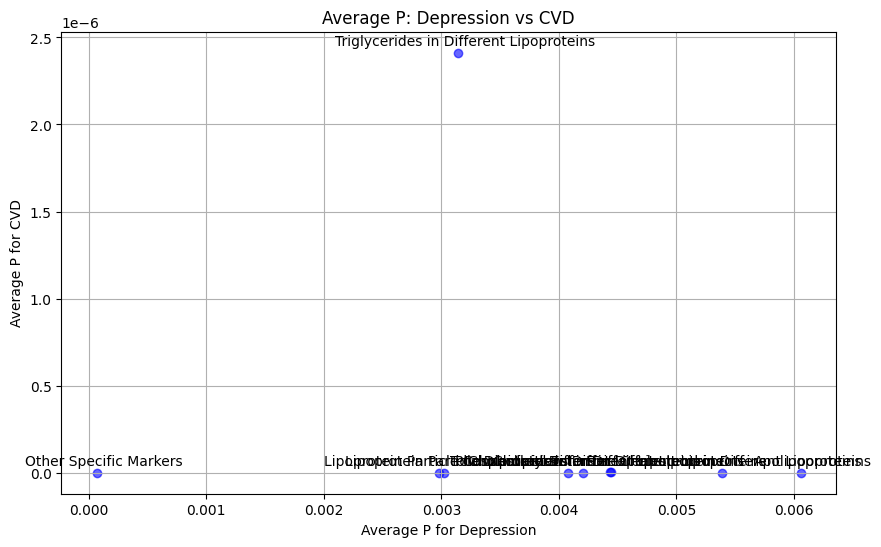

In [9]:
if __name__ == "__main__":
    visualizer = VisualizeNetwork()
    visualizer.merge_dataframes()
    visualizer.plot_scatter()